In [ ]:
#| hide
from bom.core import *

# bom

> A few helpers to work with data representing bill of materials (bom).

To see how i developed these functions in solveit, follow this link to my [GitHub Gist](https://gist.github.com/janhesse53/6331db2f61b833a20fb09c0892d547ba) or a little bit nicer rendered with [nbsanity](https://nbsanity.com/static/6f7bb5584a4bdfc90d27da451aa4927e/Parts_lists.html).

## Developer Guide

### Installation

Install latest from the GitHub [repository][repo]:

```sh
$ pip install git+https://github.com/janhesse53/bom.git
```

or from [conda][conda]

```sh
$ conda install -c janhesse53 bom
```

or from [pypi][pypi]


```sh
$ pip install bom
```


[repo]: https://github.com/janhesse53/bom
[docs]: https://janhesse53.github.io/bom/
[pypi]: https://pypi.org/project/bom/
[conda]: https://anaconda.org/janhesse53/bom

### Documentation

Documentation can be found hosted on this GitHub [repository][repo]'s [pages][docs]. Additionally you can find package manager specific guidelines on [conda][conda] and [pypi][pypi] respectively.

[repo]: https://github.com/janhesse53/bom
[docs]: https://janhesse53.github.io/bom/
[pypi]: https://pypi.org/project/bom/
[conda]: https://anaconda.org/janhesse53/bom

## How to use

In [ ]:
df, df_attributes = get_sample_data()

Build the complete graph from df (optionally merging df_attributes):

In [ ]:
G = build_complete_graph(df, df_attributes)

# Let's confirm the number of nodes (20 unique items)
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 20
Number of edges: 21


Often, we only want to visualize **one** product (like `PUMP_RV2`) and its sub-components:

In [ ]:
sub_g = select_subg_by_root(G, 'PUMP_RV2')
sub_g.nodes()

NodeView(('MOTOR_A1', 'CASE_STD1', 'PUMP_RV2', 'BEARING_01', 'VANE_002', 'VANE_ASM2'))

In [ ]:
sub_g = add_levels(sub_g)
[(n[0],n[1]['level']) for n in sub_g.nodes(data=True)]

[('MOTOR_A1', 1),
 ('CASE_STD1', 1),
 ('PUMP_RV2', 0),
 ('BEARING_01', 2),
 ('VANE_002', 2),
 ('VANE_ASM2', 1)]

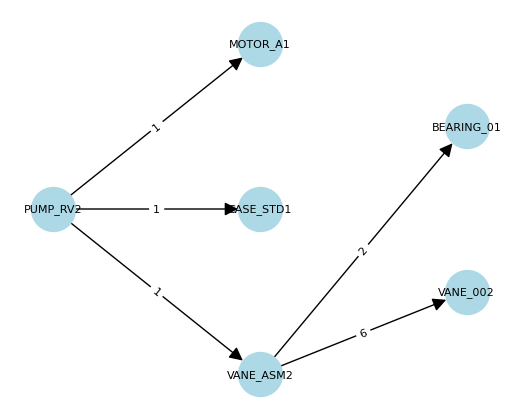

In [ ]:
plot_graph(sub_g, layout='multipartite', figsize=(5,4), font_size=8)

### Graph Querying

With the **complete graph**, we can answer many questions:

**Which products contain a certain part?**  

In [ ]:
get_all_predecessors(G, 'BEARING_01')

['VANE_ASM1', 'VANE_ASM2', 'PUMP_RV1', 'PUMP_RV2']

**All sub-components of a certain product?**  

In [ ]:
get_all_successors(G, 'PUMP_CL1')

['MOTOR_A1', 'CASE_CL1', 'CLAW_ASM1', 'CLAW_001', 'BEARING_02']

**Edge attributes** (like `quantity`):  

In [ ]:
for (u,v,d) in G.edges(data=True):
  if 'quantity' in d and d['quantity'] > 1:
      print(u, '-->', v, '[qty=', d['quantity'], ']')

VANE_ASM1 --> VANE_001 [qty= 6 ]
VANE_ASM1 --> BEARING_01 [qty= 2 ]
VANE_ASM2 --> VANE_002 [qty= 6 ]
VANE_ASM2 --> BEARING_01 [qty= 2 ]
SCREW_ASM1 --> SCREW_001 [qty= 2 ]
SCREW_ASM1 --> BEARING_02 [qty= 4 ]
CLAW_ASM1 --> CLAW_001 [qty= 2 ]
CLAW_ASM1 --> BEARING_02 [qty= 4 ]


**Node attributes** (like `component_type`, `cost`):

In [ ]:
# Example: Print the cost of each node if it exists
for n, attrs in G.nodes(data=True):
  if 'cost' in attrs:
      print(n, 'cost=', attrs['cost'])

PUMP_RV1 cost= 2500
MOTOR_A1 cost= 800
CASE_STD1 cost= 400
VANE_ASM1 cost= 300
OIL_SYSTEM1 cost= 150
VANE_001 cost= 50
BEARING_01 cost= 30
PUMP_RV2 cost= 2300
VANE_ASM2 cost= 280
VANE_002 cost= 65
PUMP_SC1 cost= 3000
MOTOR_B1 cost= 1000
CASE_SC1 cost= 600
SCREW_ASM1 cost= 450
SCREW_001 cost= 150
BEARING_02 cost= 45
PUMP_CL1 cost= 2800
CASE_CL1 cost= 450
CLAW_ASM1 cost= 400
CLAW_001 cost= 140
